# COVID-19 By the Numbers 

This notebook uses numbers published by the New York Times available on GitHub. 

https://github.com/nytimes/covid-19-data

The data includes county-by-county data and state-wide data in CSV format. It's only necessary to load the county data because we know how to group by!

In [10]:
import pandas as pd
import math

counties = pd.read_csv('us-counties.csv', parse_dates=['date'], index_col='date')

## Sate Data 

The cell below uses the group_by function of Pandas to show state-wide graphs. 

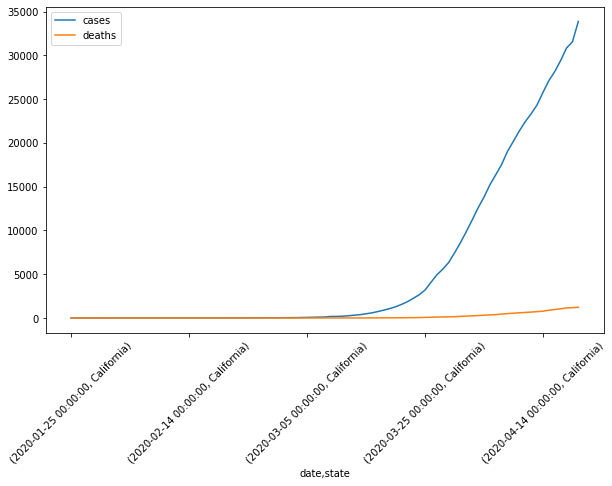

In [40]:
state = "California"

fig = data.query(f"state == '{state}'") \
    .groupby(['date', 'state']) \
    .sum()

fig[['cases', 'deaths']].plot(rot=45, figsize=(10,6))

### Are We There Yet? 

What about **new** cases? The data is sufficient to determine those values by taking the deriviative (or differential) of the graph in the previous cell. Derivatives are noisy. This plot also does a seven-day rolling average to smooth out cases. 


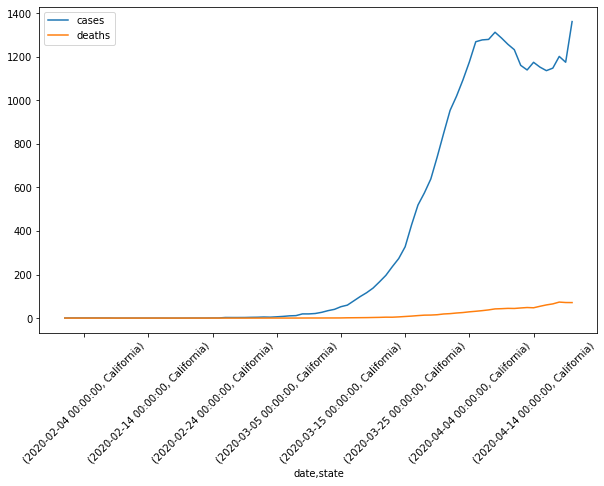

In [56]:
state = "California"

fig = data.query(f"state == '{state}'") \
    .groupby(['date', 'state']) \
    .sum() \
    .diff() \
    .rolling(7).mean()

fig[['cases', 'deaths']].plot(rot=45, figsize=(10,6))

## County Data 

Comparing counties produces more than one data series in a query. They are separated by the `pivot()` function. Use the cell below to compare the rates of COVID-19 in counties.

county,Monterey,San Benito,San Mateo,Santa Clara,Santa Cruz
date,,,,,
2020-01-31,NaN,NaN,NaN,1.0,NaN
2020-02-01,NaN,NaN,NaN,1.0,NaN
2020-02-02,NaN,NaN,NaN,2.0,NaN
2020-02-03,NaN,NaN,NaN,2.0,NaN
2020-02-04,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...
2020-04-16,119.0,42.0,767.0,1833.0,96.0
2020-04-17,119.0,44.0,797.0,1870.0,98.0
2020-04-18,136.0,44.0,838.0,1870.0,101.0


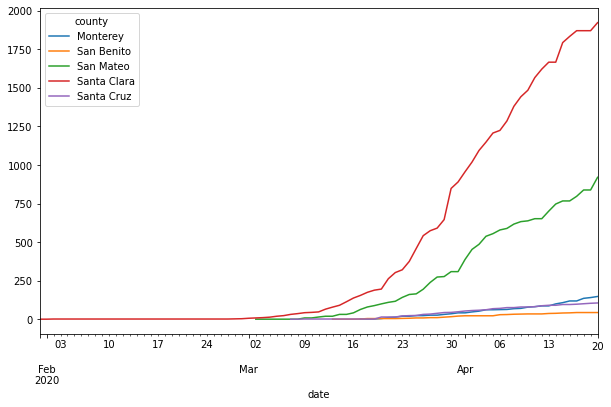

In [49]:
counties = ['Santa Cruz', 'Monterey', 'San Benito', 'Santa Clara', 'San Mateo']
state = 'California'

query = f"""state == '{state}' and ({" or ".join([f"county == '{x}'" for x in counties])})"""
fig = data.query(query) \
    .pivot(columns='county', values='cases')

fig.plot(figsize=(10,6))
fig

### Are We Bending the Curve? 

Let's look at Santa Cruz and neighboring counties to see new cases.

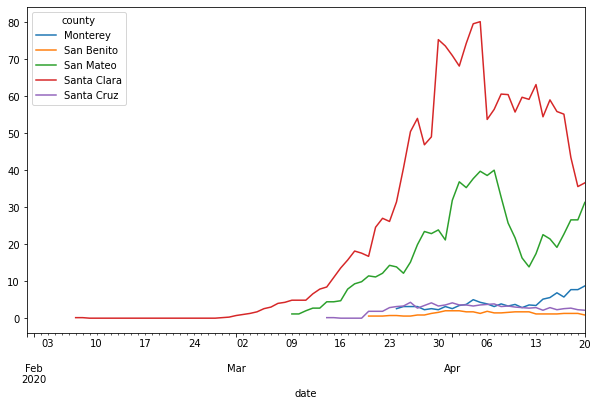

In [60]:
counties = ['Santa Cruz', 'Monterey', 'San Benito', 'Santa Clara', 'San Mateo']
state = 'California'

query = f"""state == '{state}' and ({" or ".join([f"county == '{x}'" for x in counties])})"""
fig = data.query(query) \
    .pivot(columns='county', values='cases') \
    .diff() \
    .rolling(7).mean()

fig.plot(figsize=(10,6))